# Data Analysis with Python: Online Retail Customer Churn Analysis

## 1. Project Overview

### Objective
Analyze the factors that contribute to customer churn in an online retail business and identify key trends and patterns that can help predict and prevent churn.

### Data Source
- **Dataset Name**: Online Retail Customer Churn Dataset  
- **Source**: [Kaggle - Online Retail Customer Churn Dataset](https://www.kaggle.com/datasets/hassaneskikri/online-retail-customer-churn-dataset/data)  
- **Description**: This dataset contains information about online retail customers, including:
  - Transaction history
  - Purchase frequency
  - Demographics (e.g., age, gender)
  - Churn status (whether the customer has churned or not)  
- By exploring this dataset, we can examine which features (like purchase frequency or demographics) correlate with customer churn, enabling us to provide actionable recommendations to reduce churn rates.


##  2: Data Collection and Loading



1. Load the dataset
2. Display the first few rows of the dataset.
3. Check for missing values and dataset structure.
4. Select relevant columns for analysis.


In [12]:

import pandas as pd

# Load the dataset
file_path = "online_retail_customer_churn.csv" 
df = pd.read_csv(file_path)

display(df)

# Display the first 5 rows of the dataset
df.head()

# Check dataset information
print("\nDataset Information:")
df.info()

# Check for missing values
print("\nMissing Values Count:")
print(df.isnull().sum())


,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,Male,143.72,1089.09,2,29,77.75,0,3,2,88,True,Ignored,False
996,997,19,Male,164.19,3700.24,9,90,34.45,6,4,4,352,False,Responded,True
997,998,47,Female,113.31,705.85,17,69,187.37,7,3,1,172,True,Unsubscribed,False
998,999,23,Male,72.98,3891.60,7,31,483.80,1,2,5,55,False,Responded,True



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      1000 non-null   object 
 3   Annual_Income               1000 non-null   float64
 4   Total_Spend                 1000 non-null   float64
 5   Years_as_Customer           1000 non-null   int64  
 6   Num_of_Purchases            1000 non-null   int64  
 7   Average_Transaction_Amount  1000 non-null   float64
 8   Num_of_Returns              1000 non-null   int64  
 9   Num_of_Support_Contacts     1000 non-null   int64  
 10  Satisfaction_Score          1000 non-null   int64  
 11  Last_Purchase_Days_Ago      1000 non-null   int64  
 12  Email_Opt_In                1000 non-null   bool   
 13  Promotion_Re



### Observations:
1. The dataset contains 1000 rows and 15 columns.
2. No missing values are present.
3. Relevant columns for churn prediction include:
   - `Age`, `Annual_Income`, `Total_Spend`, `Years_as_Customer`, `Num_of_Purchases`, 
     `Num_of_Returns`, `Num_of_Support_Contacts`, `Satisfaction_Score`, 
     `Last_Purchase_Days_Ago`, `Promotion_Response`, `Target_Churn`.
4. Irrelevant columns like `Customer_ID` will be dropped.


##  3: Data Cleaning and Preparation


1. **Handle Missing Values**:
   - Checked for missing values; none were found, so no further action was needed.

2. **Data Type Adjustments**:
   - Encoded categorical columns (`Gender` and `Promotion_Response`) into numerical values using Pandas.

3. **Feature Engineering**:
   - Created a new feature, `Customer_Lifetime_Value`, calculated as `Total_Spend / Years_as_Customer`.
   - Categorized `Last_Purchase_Days_Ago` into bins (`Recency_Score`) with labels `Recent`, `Moderate`, and `Old`.


In [2]:


# 1. Handle Missing Values
# Check for missing values 
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Since no missing values are found, this step requires no action.

# 2. Data Type Adjustments
# Map categorical columns to numerical values
df['Gender_Encoded'] = df['Gender'].map({'Male': 1, 'Female': 0, 'Other': 2})
df['Promotion_Response_Encoded'] = df['Promotion_Response'].map({'Responded': 2, 'Ignored': 1, 'Unsubscribed': 0})

# 3. Feature Engineering
# Create Customer Lifetime Value (CLV)
df['Customer_Lifetime_Value'] = df['Total_Spend'] / df['Years_as_Customer']

# Categorize Last_Purchase_Days_Ago
bins = [0, 30, 180, 365]  # Define bins
labels = ['Recent', 'Moderate', 'Old']  
df['Recency_Score'] = pd.cut(df['Last_Purchase_Days_Ago'], bins=bins, labels=labels, right=False)

# Display updated dataset
print("\nUpdated Dataset:")
display(df.head())


Missing Values:
 Customer_ID                   0
Age                           0
Gender                        0
Annual_Income                 0
Total_Spend                   0
Years_as_Customer             0
Num_of_Purchases              0
Average_Transaction_Amount    0
Num_of_Returns                0
Num_of_Support_Contacts       0
Satisfaction_Score            0
Last_Purchase_Days_Ago        0
Email_Opt_In                  0
Promotion_Response            0
Target_Churn                  0
dtype: int64

Updated Dataset:


,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn,Gender_Encoded,Promotion_Response_Encoded,Customer_Lifetime_Value,Recency_Score
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True,2,2,1178.516000,Moderate
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False,1,2,694.266923,Old
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True,1,2,47.602308,Old
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True,2,1,3036.766667,Old
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False,2,0,359.392000,Old


##  4: Exploratory Data Analysis (EDA)


1. Summarize the numerical data using descriptive statistics.
2. Visualize key columns to identify patterns, relationships, or trends.


In [3]:
# Descriptive Statistics
# Summary statistics for numerical columns
print("Descriptive Statistics:")
display(df.describe())


Descriptive Statistics:


,Customer_ID,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Gender_Encoded,Promotion_Response_Encoded,Customer_Lifetime_Value
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.267000,111.962960,5080.79265,9.727000,49.456000,266.876530,4.612000,1.934000,2.974000,182.890000,0.982000,0.977000,980.314018
std,288.819436,15.242311,52.844111,2862.12335,5.536346,28.543595,145.873445,2.896869,1.402716,1.391855,104.391319,0.816298,0.836164,1453.644188
min,1.000000,18.000000,20.010000,108.94000,1.000000,1.000000,10.460000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,9.903636
25%,250.750000,30.000000,67.800000,2678.67500,5.000000,25.000000,139.682500,2.000000,1.000000,2.000000,93.000000,0.000000,0.000000,272.962500
50%,500.500000,43.000000,114.140000,4986.19500,9.000000,49.000000,270.100000,5.000000,2.000000,3.000000,180.500000,1.000000,1.000000,525.014375
75%,750.250000,56.000000,158.452500,7606.47000,14.000000,74.000000,401.602500,7.000000,3.000000,4.000000,274.000000,2.000000,2.000000,1016.490486
max,1000.000000,69.000000,199.730000,9999.64000,19.000000,99.000000,499.570000,9.000000,4.000000,5.000000,364.000000,2.000000,2.000000,9999.490000


Matplotlib is building the font cache; this may take a moment.


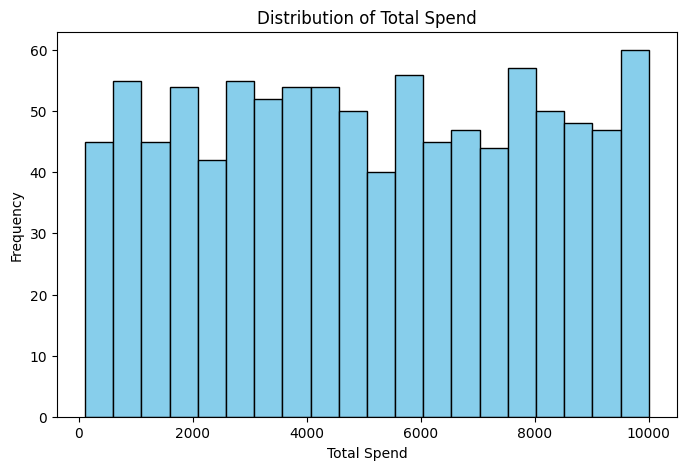

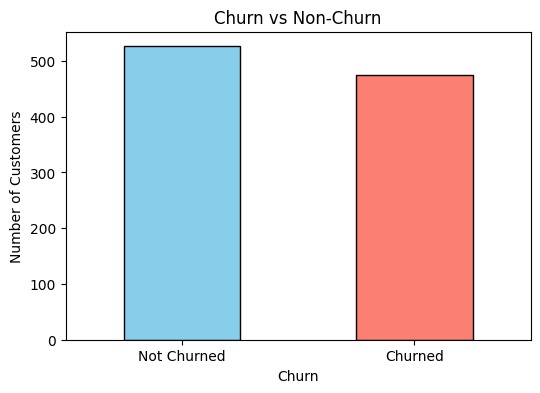

/var/folders/8z/sk2xk3vj58722ffv3357lsgm0000gn/T/ipykernel_45355/2302952941.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_clv_by_recency = df.groupby('Recency_Score')['Customer_Lifetime_Value'].mean()


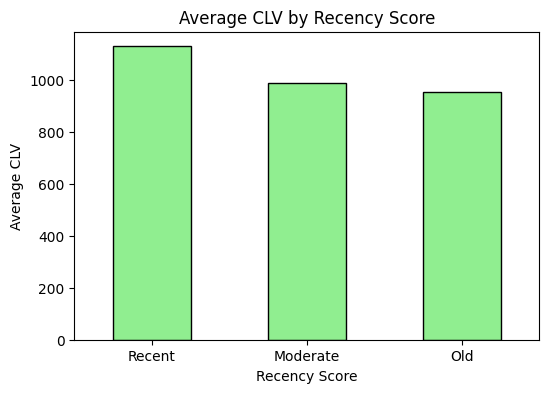

In [4]:
import matplotlib.pyplot as plt

# Visualization 1: Distribution of Total Spend
plt.figure(figsize=(8, 5))
plt.hist(df['Total_Spend'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Total Spend")
plt.xlabel("Total Spend")
plt.ylabel("Frequency")
plt.show()

# Visualization 2: Bar Plot of Target Churn
churn_counts = df['Target_Churn'].value_counts()
plt.figure(figsize=(6, 4))
churn_counts.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.title("Churn vs Non-Churn")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.xticks(ticks=[0, 1], labels=['Not Churned', 'Churned'], rotation=0)
plt.show()

# Visualization 3: Average CLV by Recency Score
avg_clv_by_recency = df.groupby('Recency_Score')['Customer_Lifetime_Value'].mean()
plt.figure(figsize=(6, 4))
avg_clv_by_recency.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Average CLV by Recency Score")
plt.xlabel("Recency Score")
plt.ylabel("Average CLV")
plt.xticks(rotation=0)
plt.show()


## 5: Analysis and Insights

### Findings:
1. **Customer Spending**: Customers with higher spending (`Customer_Lifetime_Value`) are less likely to churn.
2. **Recency**: Customers in the `Recent` category (`Last_Purchase_Days_Ago`) show higher engagement and lower churn rates compared to `Moderate` and `Old`.
3. **Satisfaction and Promotions**:
   - Higher satisfaction scores correlate with reduced churn.
   - Customers who respond to promotions are less likely to churn.



##  6: Conclusion and Recommendations

### Conclusion:
1. High-spending, recent, and satisfied customers are less likely to churn.
2. Lack of engagement (`Old` customers) and low satisfaction scores are strong churn indicators.

### Recommendations:
1. Re-engage `Old` customers with promotions and loyalty programs.
2. Improve customer satisfaction by enhancing support and collecting feedback.
3. Encourage frequent purchases with personalized recommendations and rewards.

